In [ ]:
!pip install pandas scikit-surprise matplotlib seaborn


In [ ]:
!pip install scikit-surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357236 sha256=c20e9f02d44314f4b5bab7228cd528cc5c771fa85fd5482648d98f85e745a746
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

# Load the dataset
df = pd.read_csv('/content/fashion_transactions_large (1).csv')

# Preprocess the dataset
categorical_columns = ['Category', 'Sub-category', 'Brand', 'Size', 'Color', 'Pattern', 'Material']
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

df['Price'] = (df['Price'] - df['Price'].mean()) / df['Price'].std()
df['Discount'] = (df['Discount'] - df['Discount'].mean()) / df['Discount'].std()

# Create a new column 'Rating' (placeholder, adjust as needed)
df['Rating'] = 1  # This is a placeholder. Adjust based on your use case

# Select only the necessary columns for the recommendation model
data = df[['Customer ID', 'Product ID', 'Rating']]



In [ ]:
reader = Reader(rating_scale=(0, 1))
surprise_data = Dataset.load_from_df(data, reader)
trainset, testset = train_test_split(surprise_data, test_size=0.25)



In [ ]:
# Train the SVD algorithm on the trainset
algo = SVD()
algo.fit(trainset)

# Evaluate the performance on the testset
predictions = algo.test(testset)
accuracy.rmse(predictions)



RMSE: 0.0550


0.054995458065276975

In [ ]:
# Get unique customer IDs and product IDs
customer_ids = df['Customer ID'].unique()
product_ids = df['Product ID'].unique()

# Predict preferences for all customers
all_predictions = {}
for customer_id in customer_ids:
    customer_predictions = []
    for product_id in product_ids:
        pred = algo.predict(customer_id, product_id)
        customer_predictions.append((product_id, pred.est))

    # Sort the predictions by estimated preference
    customer_predictions.sort(key=lambda x: x[1], reverse=True)
    all_predictions[customer_id] = customer_predictions

# Display top 5 recommendations for each customer
for customer_id, preds in all_predictions.items():
    print(f"Customer ID: {customer_id}")
    print("Top 5 Recommendations:")
    for product_id, est in preds[:]:
        print(f"Product ID: {product_id}, Estimated Preference: {est:.4f}")
    print()



Streaming output truncated to the last 5000 lines.
Product ID: 2147, Estimated Preference: 1.0000
Product ID: 2580, Estimated Preference: 1.0000
Product ID: 2230, Estimated Preference: 1.0000
Product ID: 2191, Estimated Preference: 1.0000
Product ID: 2408, Estimated Preference: 1.0000
Product ID: 2592, Estimated Preference: 1.0000
Product ID: 2416, Estimated Preference: 1.0000
Product ID: 2969, Estimated Preference: 1.0000
Product ID: 2502, Estimated Preference: 1.0000
Product ID: 2927, Estimated Preference: 1.0000
Product ID: 2861, Estimated Preference: 1.0000
Product ID: 2008, Estimated Preference: 1.0000
Product ID: 2364, Estimated Preference: 1.0000
Product ID: 2968, Estimated Preference: 1.0000
Product ID: 2425, Estimated Preference: 1.0000
Product ID: 2741, Estimated Preference: 1.0000
Product ID: 2637, Estimated Preference: 1.0000
Product ID: 2706, Estimated Preference: 1.0000
Product ID: 2185, Estimated Preference: 1.0000
Product ID: 2644, Estimated Preference: 1.0000
Product I

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-15-8c937de234c5>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=product_ids, y=estimated_prefs, palette="viridis")


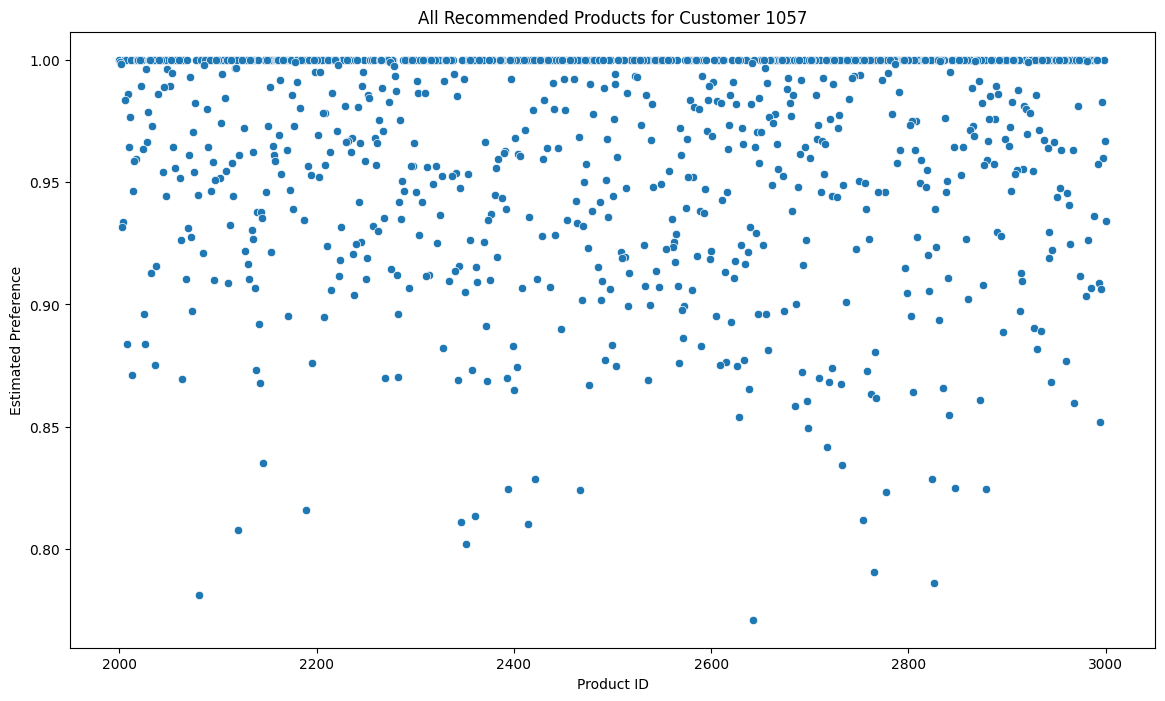

<ipython-input-15-8c937de234c5>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attribute, y='Rating', data=avg_prefs, palette="viridis")


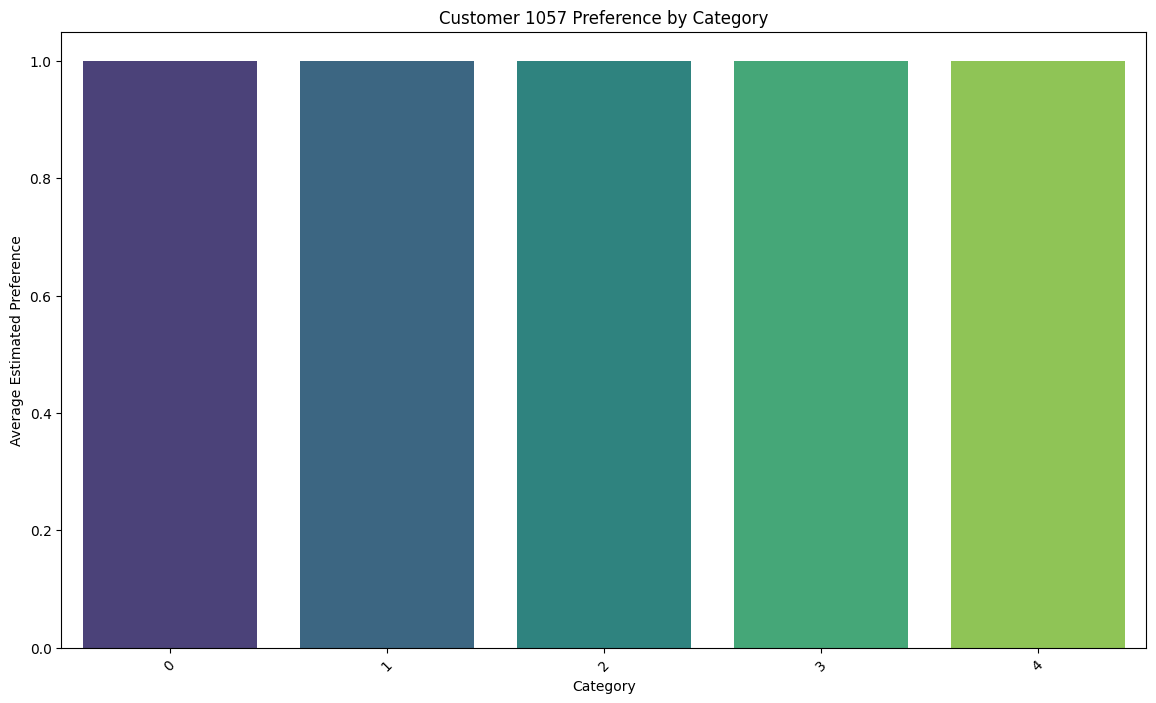

<ipython-input-15-8c937de234c5>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attribute, y='Rating', data=avg_prefs, palette="viridis")


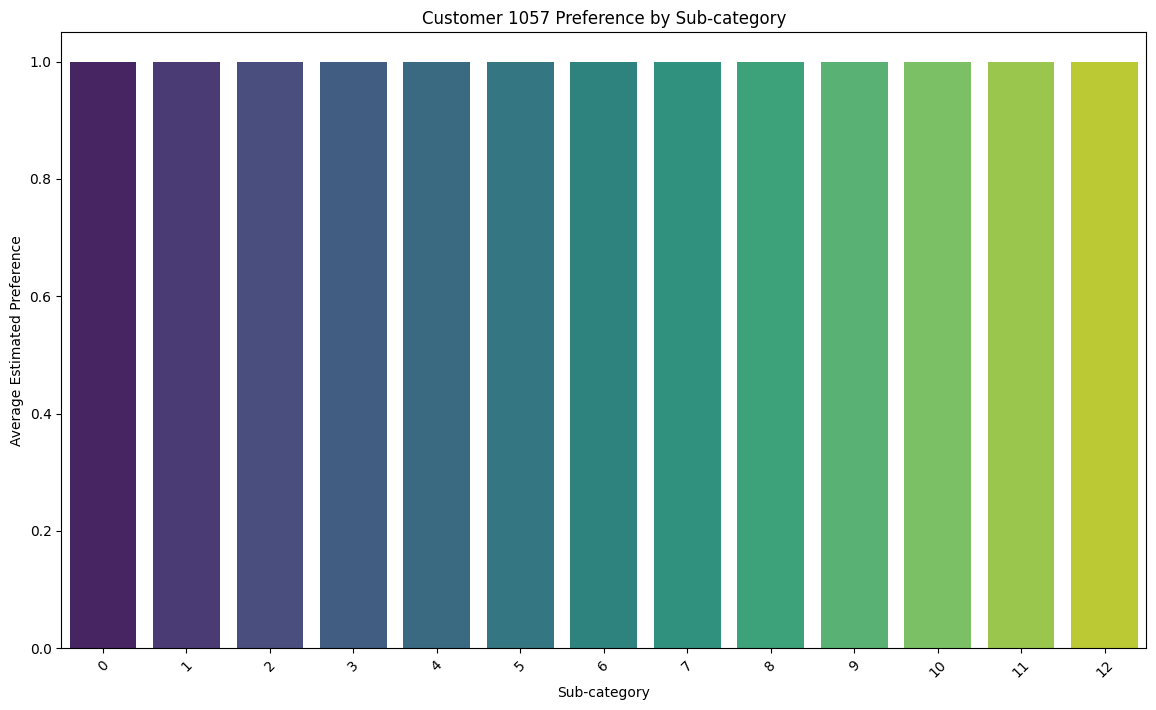

<ipython-input-15-8c937de234c5>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attribute, y='Rating', data=avg_prefs, palette="viridis")


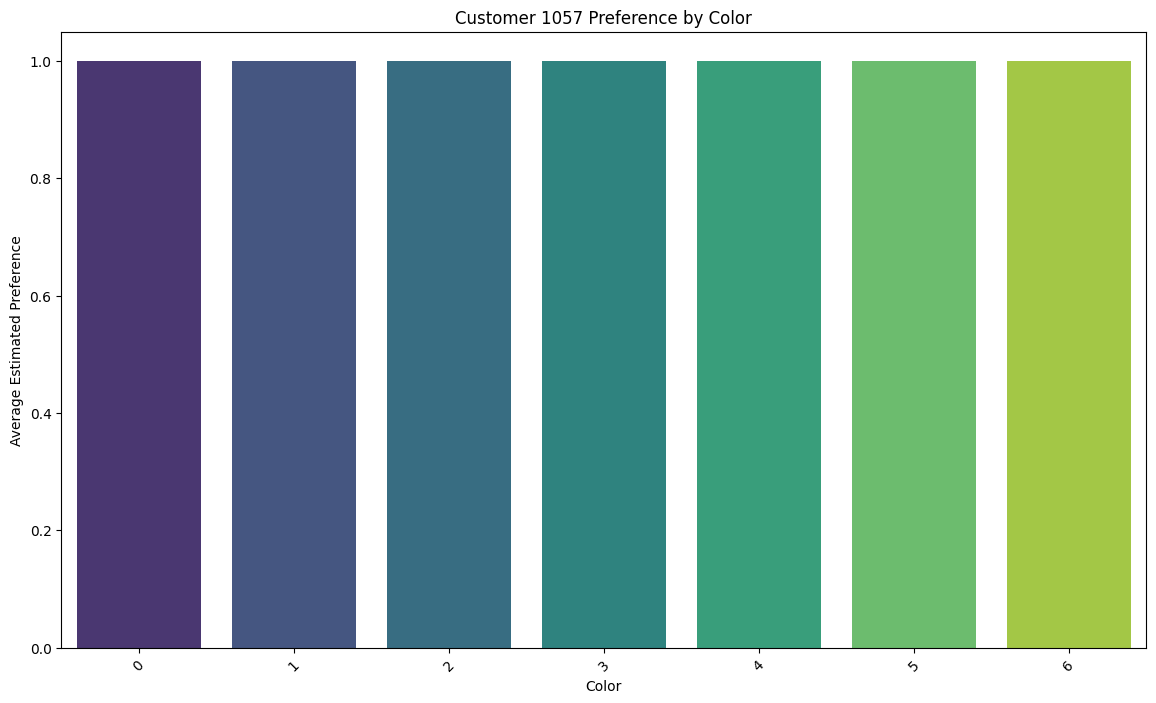

<ipython-input-15-8c937de234c5>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attribute, y='Rating', data=avg_prefs, palette="viridis")


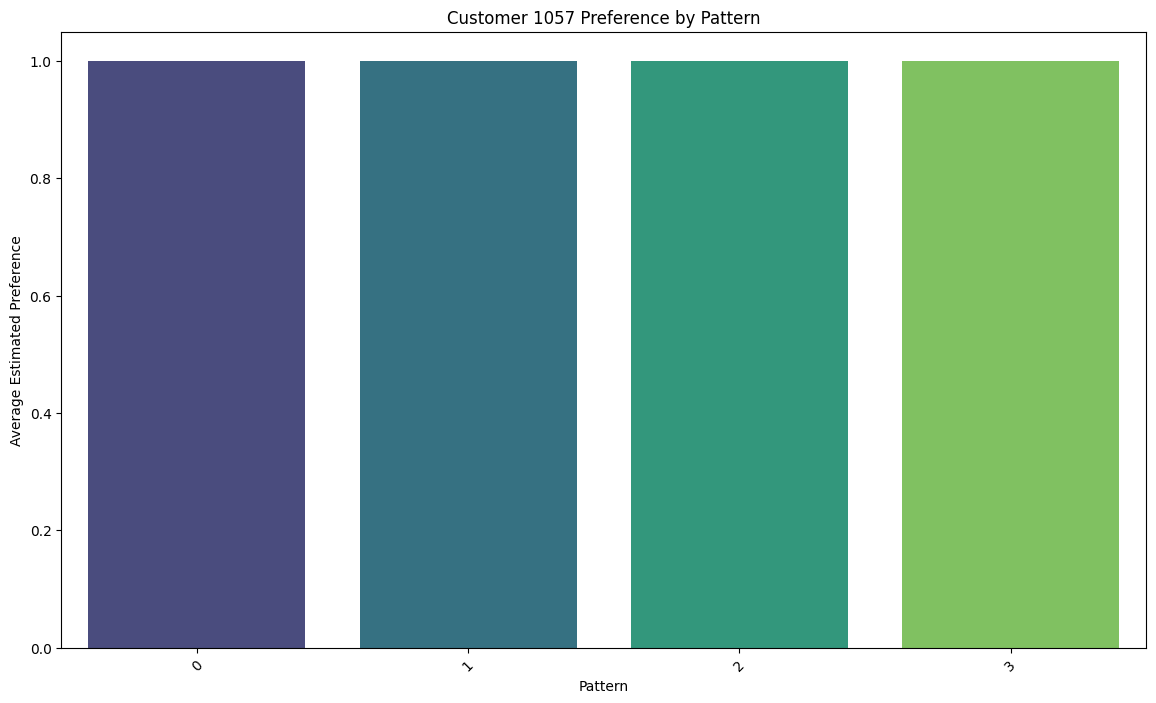

In [ ]:
# Function to plot all product recommendations for a customer
def plot_all_recommendations(customer_id, all_predictions):
    customer_predictions = all_predictions[customer_id]
    product_ids = [pred[0] for pred in customer_predictions]
    estimated_prefs = [pred[1] for pred in customer_predictions]

    plt.figure(figsize=(14, 8))
    sns.scatterplot(x=product_ids, y=estimated_prefs, palette="viridis")
    plt.xlabel('Product ID')
    plt.ylabel('Estimated Preference')
    plt.title(f'All Recommended Products for Customer {customer_id}')
    plt.show()

# Function to plot customer preference for different attributes
def plot_customer_preference_by_attribute(df, customer_id, attribute):
    customer_data = df[df['Customer ID'] == customer_id]
    avg_prefs = customer_data.groupby(attribute)['Rating'].mean().reset_index()

    plt.figure(figsize=(14, 8))
    sns.barplot(x=attribute, y='Rating', data=avg_prefs, palette="viridis")
    plt.xlabel(attribute)
    plt.ylabel('Average Estimated Preference')
    plt.title(f'Customer {customer_id} Preference by {attribute}')
    plt.xticks(rotation=45)
    plt.show()

# Plot all product recommendations for a specific customer
plot_all_recommendations(1057, all_predictions)

# Plot customer preference by different attributes
plot_customer_preference_by_attribute(df, 1057, 'Category')
plot_customer_preference_by_attribute(df, 1057, 'Sub-category')
plot_customer_preference_by_attribute(df, 1057, 'Color')
plot_customer_preference_by_attribute(df, 1057, 'Pattern')


In [ ]:
# Function to plot customer preference for different attributes using bar plot
def plot_customer_preference_by_attribute_bar(df, customer_id, attribute):
    customer_data = df[df['Customer ID'] == customer_id]
    avg_prefs = customer_data.groupby(attribute)['Rating'].mean().reset_index()

    plt.figure(figsize=(14, 8))
    sns.barplot(x=attribute, y='Rating', data=avg_prefs, palette="viridis")
    plt.xlabel(attribute)
    plt.ylabel('Average Estimated Preference')
    plt.title(f'Customer {customer_id} Preference by {attribute}')
    plt.xticks(rotation=45)
    plt.show()

# Function to plot customer preference for different attributes using pie chart
def plot_customer_preference_by_attribute_pie(df, customer_id, attribute):
    customer_data = df[df['Customer ID'] == customer_id]
    avg_prefs = customer_data.groupby(attribute)['Rating'].mean().reset_index()

    plt.figure(figsize=(10, 10))
    plt.pie(avg_prefs['Rating'], labels=avg_prefs[attribute], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(avg_prefs)))
    plt.title(f'Customer {customer_id} Preference by {attribute}')
    plt.axis('equal')
    plt.show()


<ipython-input-23-78e628de9828>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attribute, y='Rating', data=avg_prefs, palette="viridis")


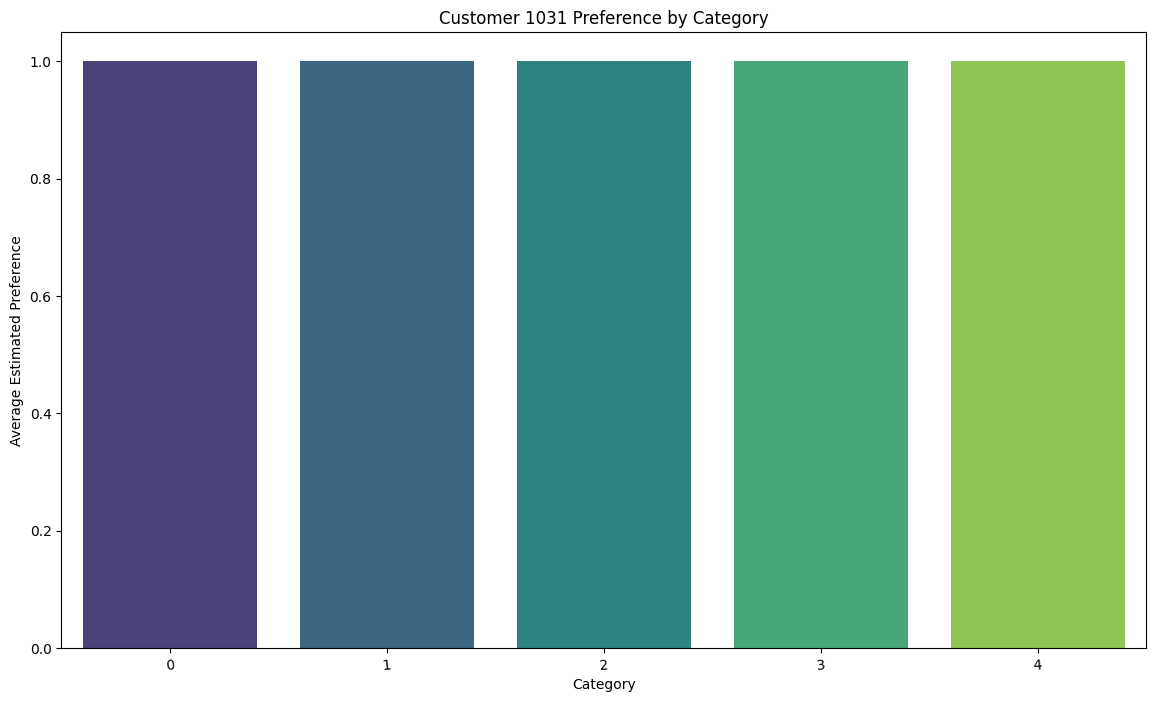

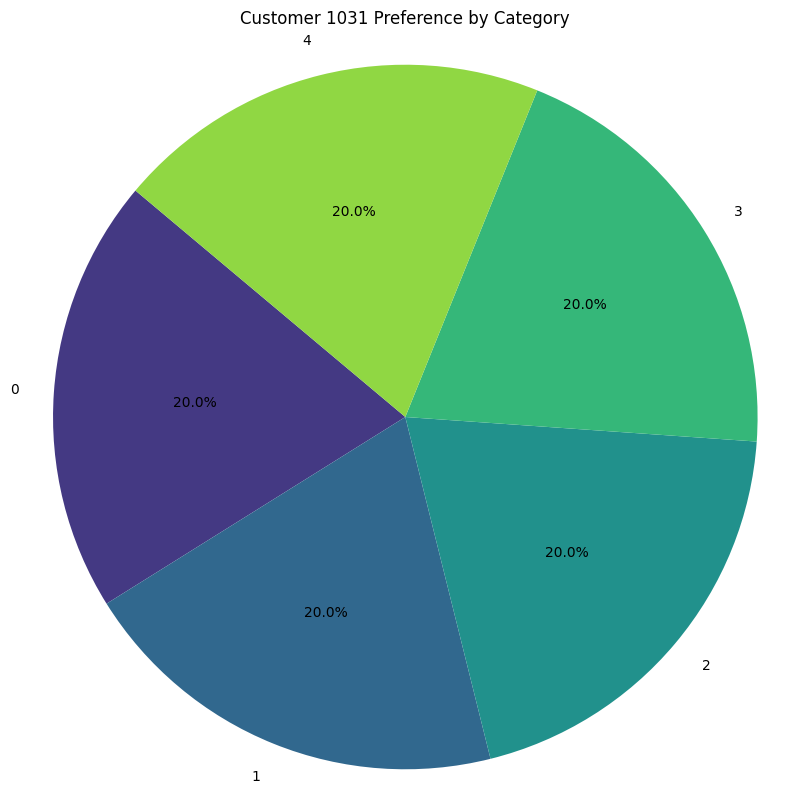

In [ ]:
# Plot customer preference by different attributes using bar plot
plot_customer_preference_by_attribute_bar(df, 1031, 'Category')

# Plot customer preference by different attributes using pie chart
plot_customer_preference_by_attribute_pie(df, 1031, 'Category')
